# Hackathon Challenge: Predicting Restaurant Annual Turnover

This notebook outlines the process of building a machine learning model to predict the annual turnover of restaurants across India based on various features provided in the dataset.

## Import Necessary Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt


# Set the aesthetics for plots
sns.set(style='whitegrid')

## Load the Datasets

In [28]:
# Load the training, test, and data dictionary datasets
train_df = pd.read_csv('../data/Train_dataset_(1).csv')
data_dictionary = pd.read_csv('../data/Data_Dictionary_(1).csv')
test_df = pd.read_csv('../data/Test_dataset_(1).csv')
sample_solution_df = pd.read_csv('../data/Sample_Solution_(1).csv')


# Display the first few rows of the train dataset and data dictionary
train_df.head(), data_dictionary

(   Registration Number  Annual Turnover           Cuisine       City  \
 0                60001         42000000      indian,irish  Bangalore   
 1                60002         50000000      indian,irish     Indore   
 2                60003         32500000   tibetan,italian    Chennai   
 3                60004        110000000  turkish,nigerian    Gurgaon   
 4                60005         20000000     irish,belgian    Manesar   
 
   Restaurant Location Opening Day of Restaurant  Facebook Popularity Quotient  \
 0   Near Business Hub                14-02-2009                          84.3   
 1      Near Party Hub                29-09-2008                          85.4   
 2   Near Business Hub                30-07-2011                          85.0   
 3      Near Party Hub                30-11-2008                          85.6   
 4      Near Party Hub                22-02-2010                           NaN   
 
         Endorsed By  Instagram Popularity Quotient  Fire Audit  .

The subsequent cells will include steps for EDA, preprocessing, model training, evaluation, and generating predictions. For now, this structure sets up the initial part of the analysis.

## Distribution of Key Numerical Features

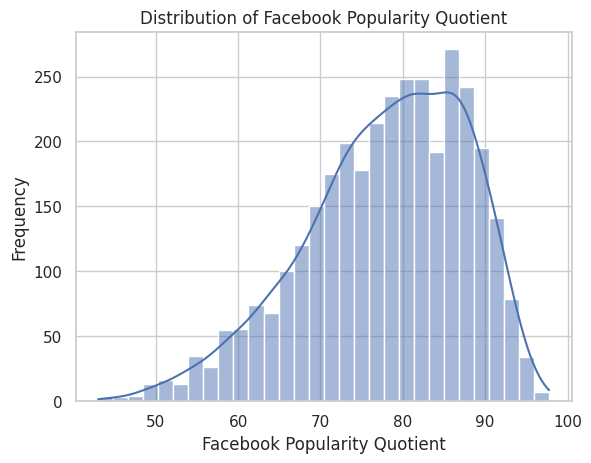

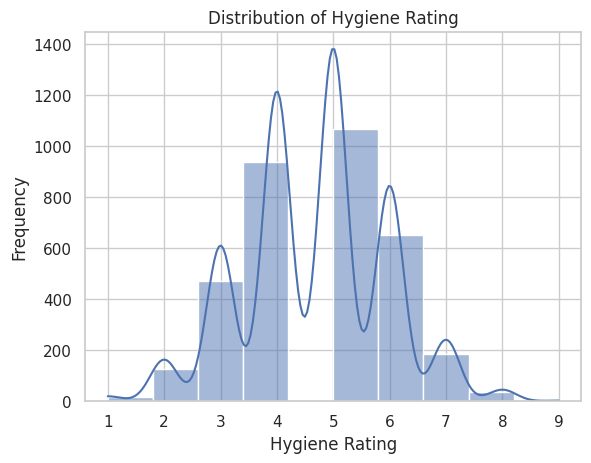

In [29]:
# Distribution of Facebook Popularity Quotient
sns.histplot(train_df['Facebook Popularity Quotient'], bins=30, kde=True)
plt.title('Distribution of Facebook Popularity Quotient')
plt.xlabel('Facebook Popularity Quotient')
plt.ylabel('Frequency')
plt.show()

# Distribution of Hygiene Rating
sns.histplot(train_df['Hygiene Rating'], bins=10, kde=True)
plt.title('Distribution of Hygiene Rating')
plt.xlabel('Hygiene Rating')
plt.ylabel('Frequency')
plt.show()


Analyzing Relationships with the Target Variable

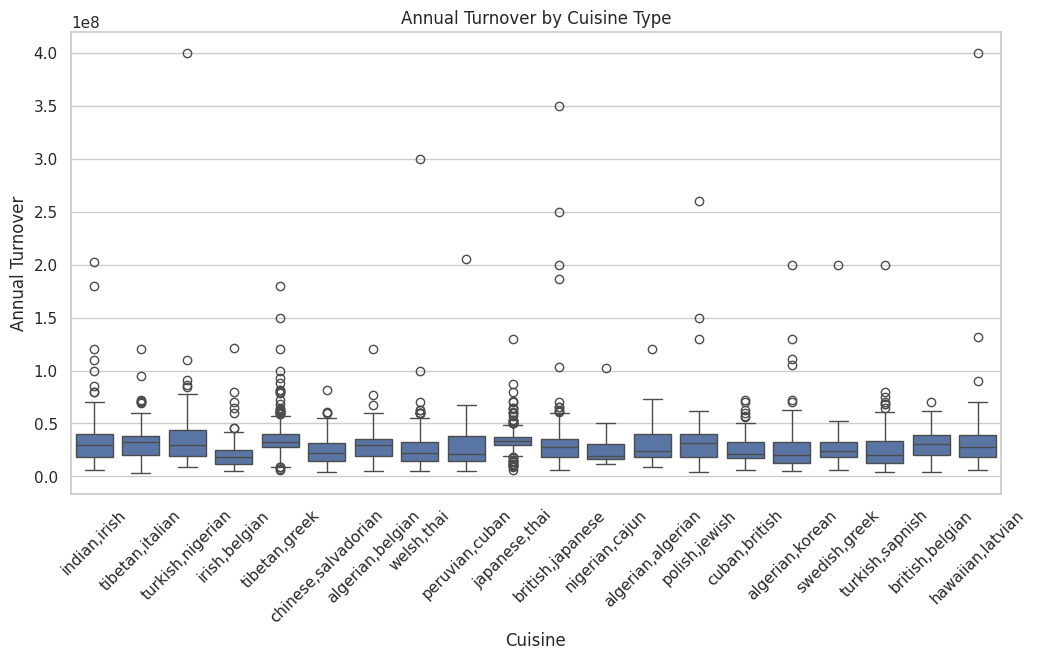

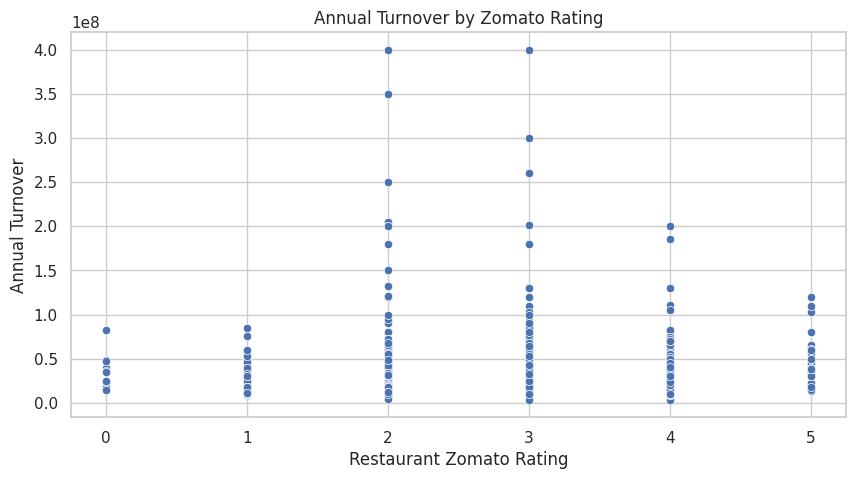

In [30]:
# Relationship between Cuisine and Annual Turnover
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cuisine', y='Annual Turnover', data=train_df)
plt.xticks(rotation=45)
plt.title('Annual Turnover by Cuisine Type')
plt.show()

# Relationship between Restaurant Zomato Rating and Annual Turnover
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Restaurant Zomato Rating', y='Annual Turnover', data=train_df)
plt.title('Annual Turnover by Zomato Rating')
plt.show()


## Correlation Analysis

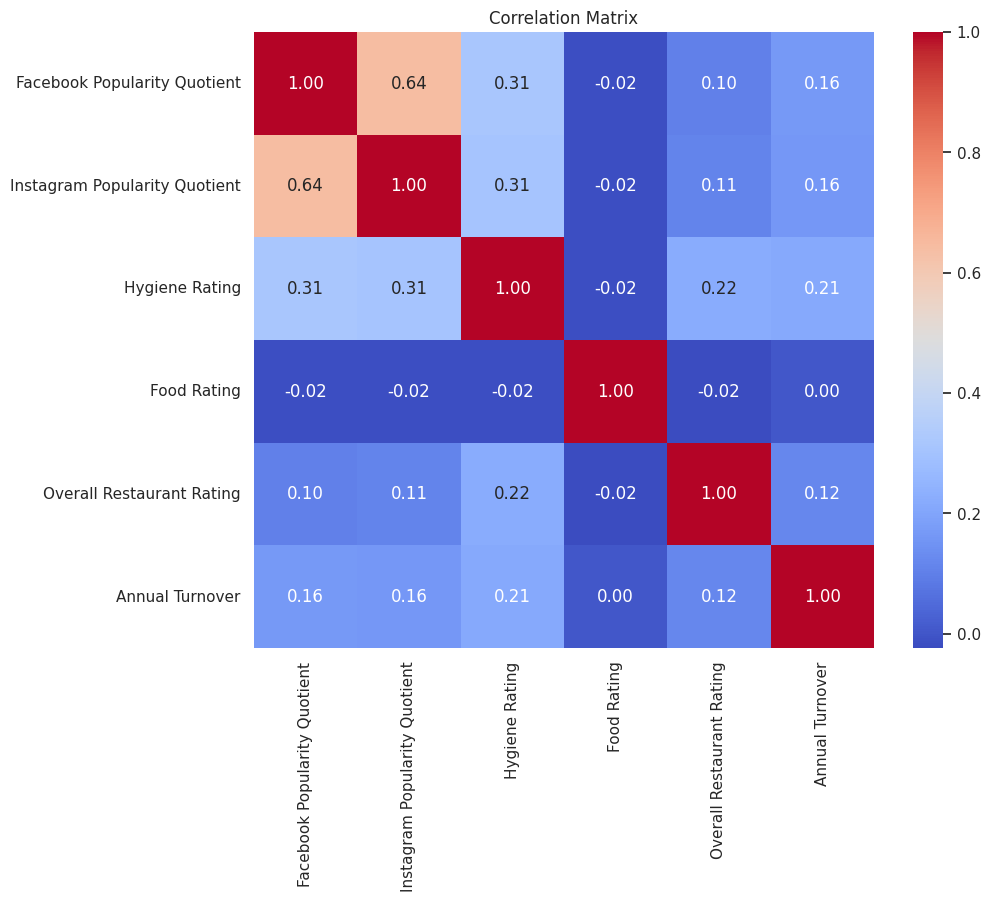

In [31]:
# Correlation matrix for numerical features and Annual Turnover
numerical_features = ['Facebook Popularity Quotient', 'Instagram Popularity Quotient', 
                      'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating', 
                      'Annual Turnover']
corr_matrix = train_df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Data Processing

## Split the Data

In [32]:
from sklearn.model_selection import train_test_split

X = train_df.drop(['Annual Turnover', 'Registration Number'], axis=1)  # Dropping the target variable and identifier
y = train_df['Annual Turnover']

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training

In [33]:
categorical_features = ['Cuisine', 'City', 'Restaurant Location', 'Endorsed By', 'Restaurant Type', 'Restaurant Theme']
numerical_features = ['Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Restaurant Zomato Rating',
                      'Order Wait Time', 'Staff Responsivness', 'Value for Money', 'Hygiene Rating', 'Food Rating',
                      'Overall Restaurant Rating', 'Live Music Rating', 'Comedy Gigs Rating', 'Value Deals Rating',
                      'Live Sports Rating', 'Ambience', 'Lively', 'Service', 'Comfortablility', 'Privacy']


In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define the model with XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Update the pipeline to use XGBoost model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', xgb_model)])

# Fit the model
model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Facebook Popularity '
                                                   'Quotient',
                                                   'Instagram Popularity '
                                                   'Quotient',
                                                   'Restaurant Zomato Rating',
                                                   'Order Wait Time',
                                                   'Staff Responsivness',
                                                   'Value for Money',
                                                   'Hygiene Rating',
                                                   'Food Rating',
                                                   'Overall Restaurant Rating',
                                                   'Live Mus...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [35]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for XGBoost
param_grid = {
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__n_estimators': [100, 200, 300]
}

# Grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# Update model to the best estimator found
model = grid_search.best_estimator_


## Predicition and RMSE Calculation

In [36]:
# Predict the Annual Turnover for the test dataset
test_predictions = model.predict(test_df.drop(['Registration Number'], axis=1, errors='ignore'))


# Correct approach for calculating RMSE on the validation set
val_predictions = model.predict(X_val)
rmse_val = sqrt(mean_squared_error(y_val, val_predictions))
print(f"Validation RMSE: {rmse_val}")


submission_df = pd.DataFrame({
    'Registration Number': sample_solution_df['Registration Number'],
    'Annual Turnover': test_predictions  # Your model's predictions
})


# Save the top 500 predictions to a CSV file
submission_path = '../data/submission_xgb.csv'
submission_df.to_csv(submission_path, index=False)


Validation RMSE: 19688055.264434036
